In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.io as sio

import torch
import utils
import time
import pickle

%matplotlib inline

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Computer Modern Sans Serif"],
    "font.size":22})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "font.size":22})

from copulas.multivariate import GaussianMultivariate, VineCopula
import pandas

In [2]:
path = './data/realworld/nutrient17.p'
U0 = utils.load_data_0(path).float(); U00 = U0.detach().clone()
nsamples = 1459
U0 = U0*nsamples/(nsamples+1)

ndims = 17

labels = ["Energy", "Protein",  "Vit A - IU", "Vit A - RE", "Vit E", "Vit C", "Thiamin", "Riboflavin", "Niacin", "Vit B6", "Folate", "Vit B12", "Calcium", "Phosphorus", "Magnesium", "Iron", "Zinc"]

U0 = pandas.DataFrame(data=U0, columns=labels)

/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:5350: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/opt/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:2640: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


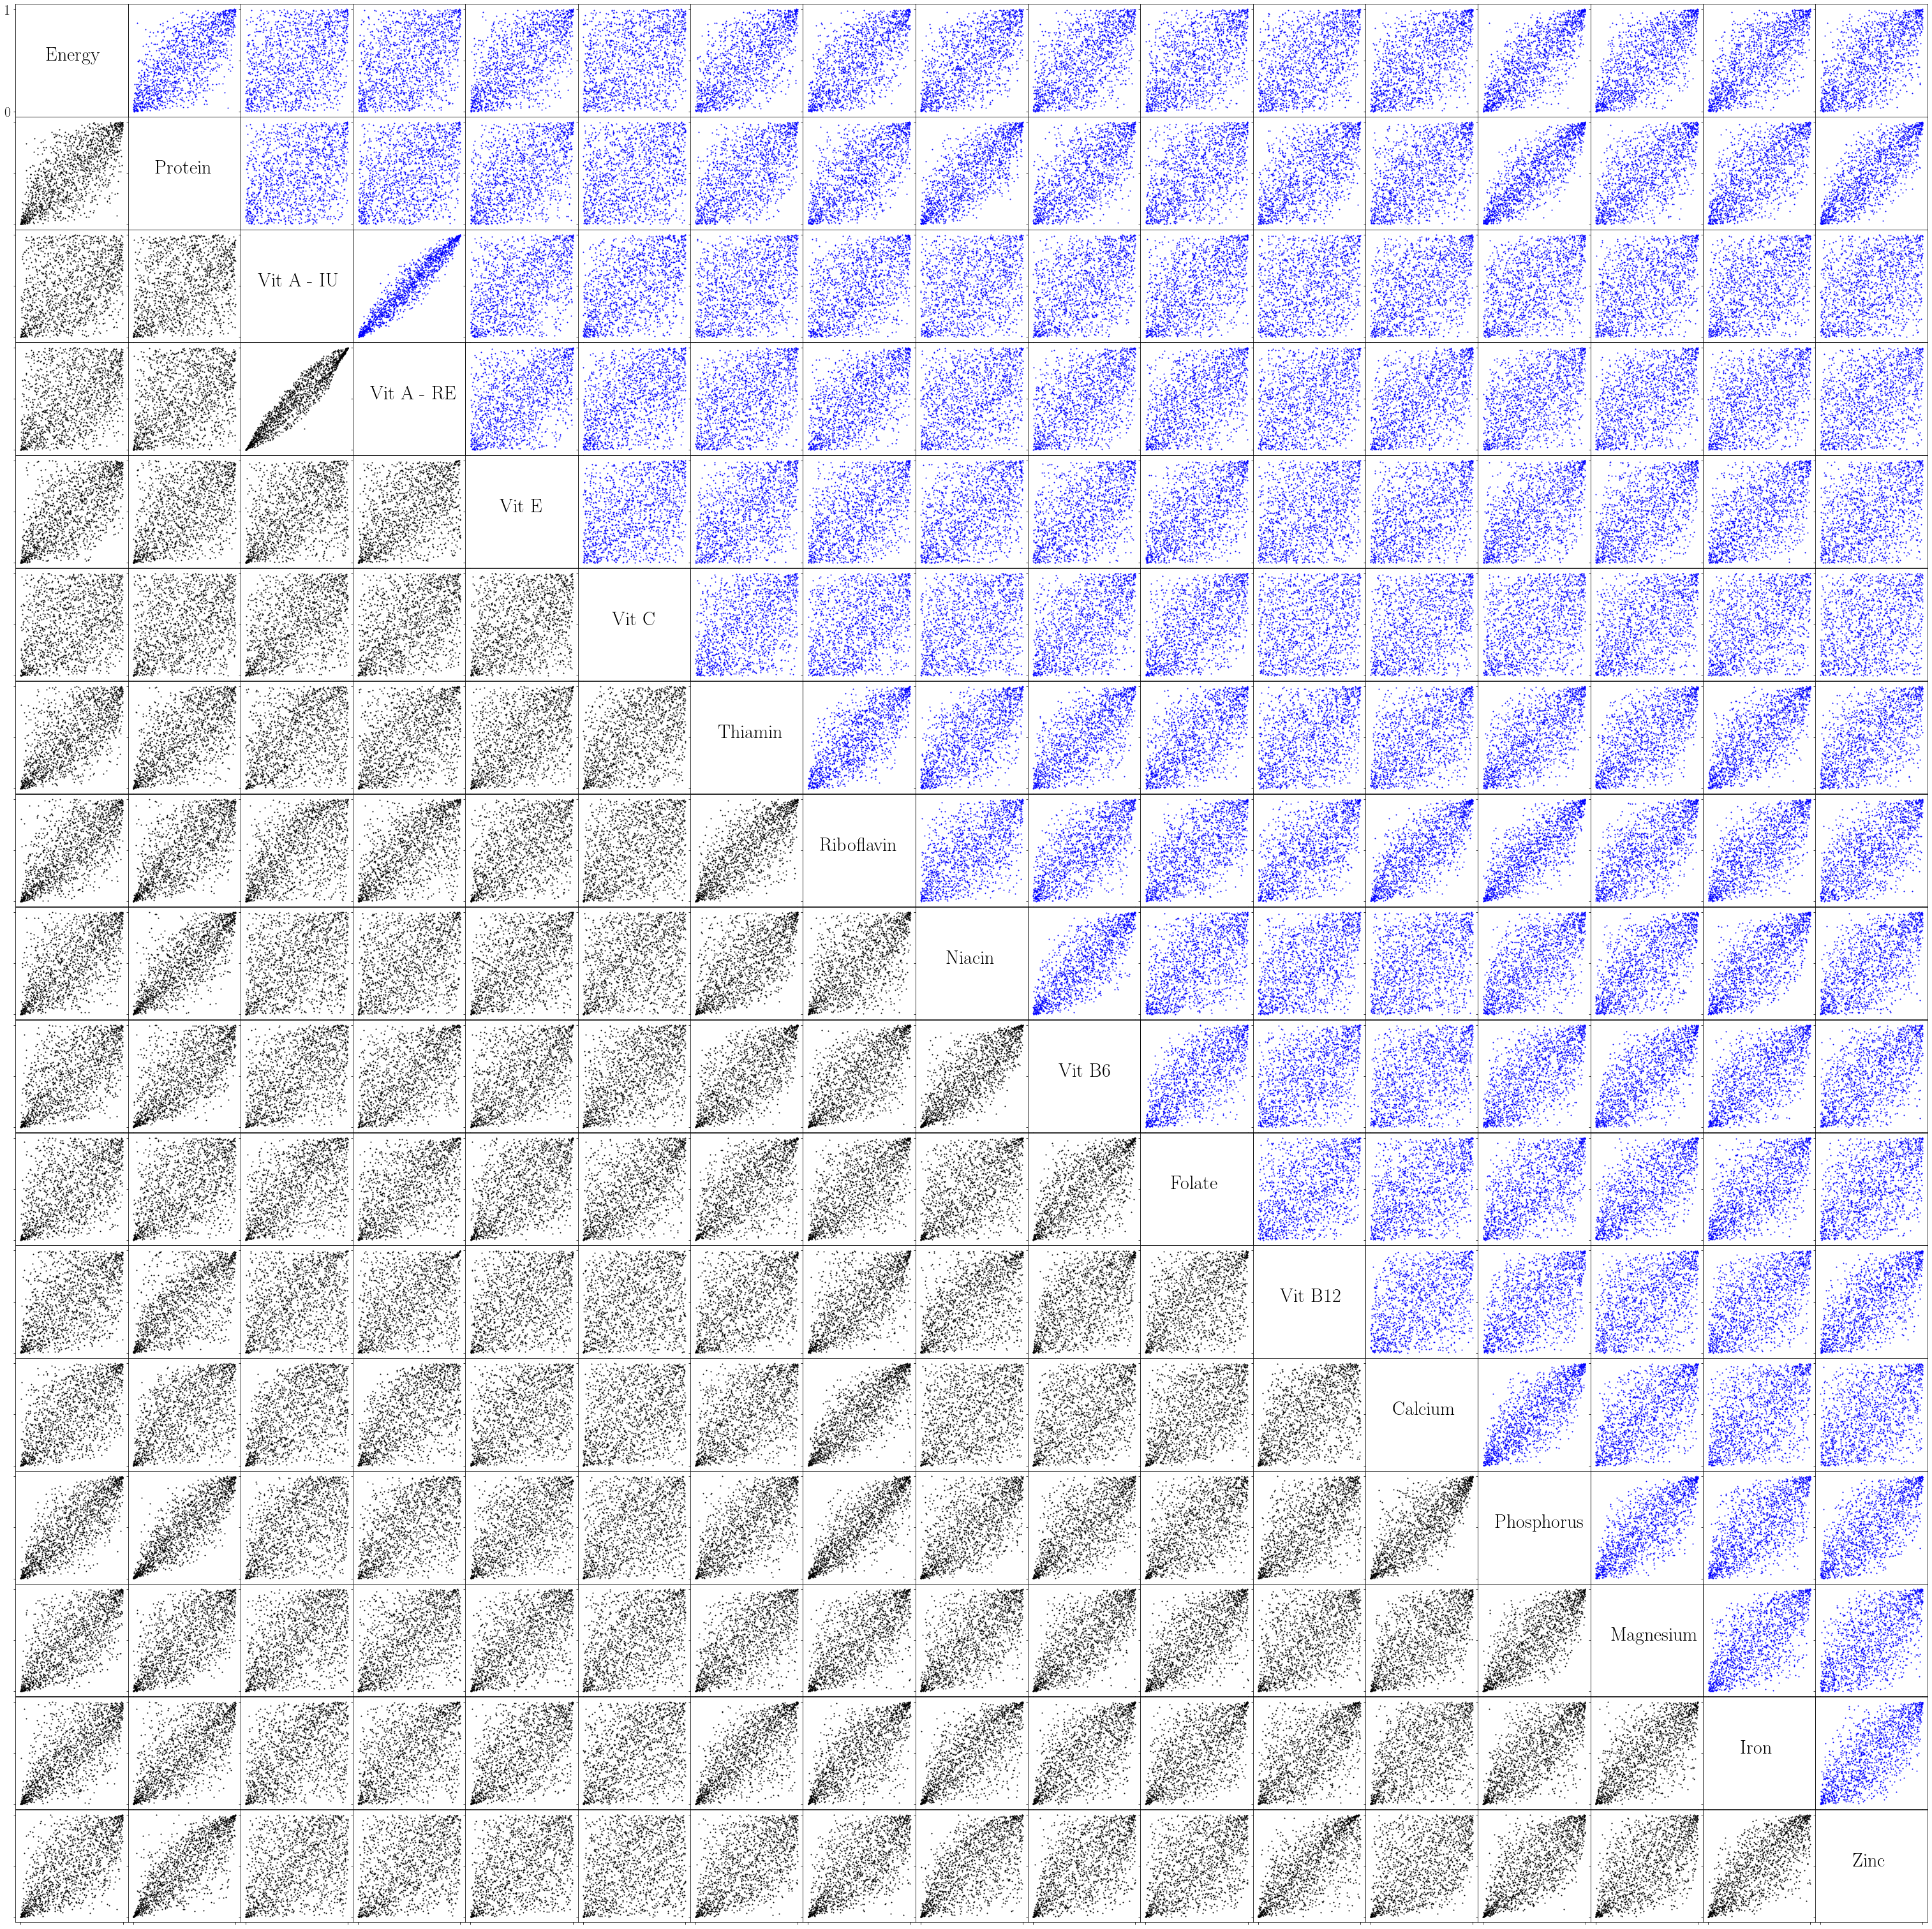

tensor(0.0001)

<Figure size 432x288 with 0 Axes>

In [3]:
copula = GaussianMultivariate()
copula.fit(U0)
U = copula.sample(nsamples)
utils.plot_U1_U2(torch.tensor(np.array(U)),torch.tensor(np.array(U0)),labels=labels)
utils.CvM(torch.tensor(np.array(U)),U00, nquery=10000)

In [ ]:
copula = VineCopula('direct')
copula.fit(U0)
U = copula.sample(nsamples)
utils.plot_U1_U2(torch.tensor(np.array(U)),torch.tensor(np.array(U0)),labels=labels)
utils.CvM(torch.tensor(np.array(U)),U00, nquery=10000)

In [ ]:
copula = VineCopula('center')
copula.fit(U0)
U = copula.sample(nsamples)
utils.plot_U1_U2(torch.tensor(np.array(U)),torch.tensor(np.array(U0)),labels=labels)
utils.CvM(torch.tensor(np.array(U)),U00, nquery=10000)

In [ ]:
copula = VineCopula('regular')
copula.fit(U0)
U = copula.sample(nsamples)
utils.plot_U1_U2(torch.tensor(np.array(U)),torch.tensor(np.array(U0)),labels=labels)
utils.CvM(torch.tensor(np.array(U)),U00, nquery=10000)